# Error and Error Propagation

## Question 1

[CODE] How many term would we need to sum in the following series to garantee a trucation error bellow $10^{-10}$:
 - $\sin(x) = x - \frac{x^3}{3!} +  \frac{x^5}{5!} - ... $ for $x \in [-\pi, \pi]$
 - $\exp(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + ... $ for $x \in [-1, 1]$
 - $\ln(1+x) = x - \frac{x^2}{2} + \frac{x^3}{3} - \frac{x^4}{4} + ... $ for $x \in ]0, 1[$
    

**Solution**

We need:
 - 11
 - 14
 - 1495  

terms to guarantee a truncation error bellow $10^{-10}$

In [1]:
import numpy as np

def getSinApprox(n):
   exponents = np.arange(1,2*n,2)
   factorials = exponents
   signs = np.ones(n)
   signs[np.arange(1,n,2)] = -1
   xs = np.arange(-np.pi,np.pi+0.01,0.01)
   approx = np.zeros(len(xs))
   for i in range(0,n):
       approx = approx + (xs**exponents[i]*signs[i]/np.math.factorial(factorials[i]))
   return max(abs(approx-np.sin(xs)))
print(getSinApprox(11)) 

def getExpApprox(n):
   exponents = np.arange(0,n,1)
   factorials = exponents
   signs = np.ones(n)
   xs = np.arange(-1,1+0.01,0.01)
   approx = np.zeros(len(xs))
   
   for i in range(0,n):
       approx = approx + ((xs**exponents[i])*signs[i]/np.math.factorial(factorials[i]))
   return max(abs(approx-np.exp(xs)))
print(getExpApprox(14))

def getLnApprox(n):
   exponents = np.arange(1,n+1,1)
   denoms = np.arange(1,n+1,1)
   signs = np.ones(n)
   signs[np.arange(1,n,2)] = -1
   xs = np.arange(0,1,0.01)
   approx = np.zeros(len(xs))
   for i in range(0,n):
       approx = approx + (xs**exponents[i]*signs[i]/denoms[i])
   return max(abs(approx-np.log(xs+1)))
print(getLnApprox(1495))

1.087647940462011e-11
1.2285727990501982e-11
9.922329624600934e-11


## Question 2

Assume that $\tilde{x}=0.937$ has three exact decimals with respect to $x$
- 1) What is the absolute error on x ?
- 2) What is the relative error on x in % ?

If $f(x) = \sqrt{1-x}$
- 3) What is the (maximal) absolute error on f(x) ?
- 4) What is the (maximal) relative error on f(x) in % ?

Hint:  use partial derivative of f with respect to x


Now, Assume that $\tilde{x}=0.999$ and still has three exact decimals with respect to $x$
- 5) What is the (maximal) absolute error on f(x) ?
- 6) What is the (maximal) relative error on f(x) in % ?

[CODE] Use matplotlib to plot on the same figure:
- 7) $f(x)$, $f(x)+|e_f(x)|$ and $f(x)-|e_f(x)|$ for $x \in [0.9,1[$  (assume $e_x$ is constant ($e_x = 10^{-3}$))


**Solutions**

1) Assuming $\tilde{x}$ is a representation of $x$ rounded to 3 decimals, we know $x \in [0.9365, 0.9375]$. Taking the worst case into account, $e_x = \tilde{x}-x \le |0.937 - 0.9375| = 5 \cdot 10^{-4}$

2) $\epsilon_x = \frac{e_x}{x} \leq \frac{5 \cdot 10^{-4}}{0.9365} \approx  0.05\% $

3) $e_f \le \left|\frac{\partial f(x)}{\partial x}\right| \cdot \left|e_x\right| = \left|\frac{-1}{2\sqrt{1-x}}\right| \cdot \left|e_x\right| = \left|\frac{-1}{2\sqrt{1-0.9375}}\right| \cdot 5 \cdot 10^{-4} = 10^{-3} $

4) $\epsilon_f \le \frac{e_f}{f} = \frac{10^{-3}}{0.25} = 0.4\% $

5) $e_f \leq \left|\frac{-1}{2\sqrt{1-0.9995}}\right| \cdot 5 \cdot 10^{-4} = 1.11 \cdot 10^{-2} $

6) $\epsilon_f \le \frac{1.11 \cdot 10^{-2}}{0.022} \approx 50\% $

7) [CODE]

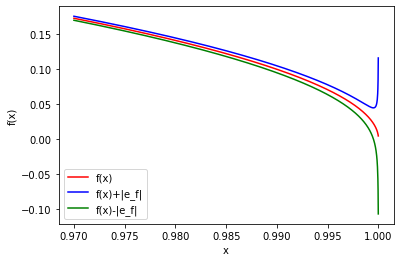

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.97, 0.99999999999, 0.00002)
f = np.sqrt(1-x)
error = np.abs(-1/(2*np.sqrt(1-x)))*0.001
#print(error)
plt.plot(x, f,'r')
plt.plot(x,f+error,'b')
plt.plot(x,f-error,'g')
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.title('Sine and Cosine')
plt.legend(['f(x)','f(x)+|e_f|','f(x)-|e_f|'])
plt.show()

## Question 3

How would you propagate the error $e_x, e_y$ and $e_z$ associated to $x$, $y$ and $z$ trhough the function

$f(x,y,z) = \sin(x) \cdot y^2 + \frac{z^3}{y} - x + x y z$


**Solution**

$\left|e_f\right| \le \left|y^2 \cos(x) - 1 + yz\right| \cdot \left|e_x\right| + \left|2 y \sin(x) - \frac{z^3}{y^2} + xz\right| \cdot \left|e_y\right| + \left| \frac{3z^2}{y} + xy\right| \cdot \left|e_z\right|$

## Question 4

You have a data set of $N$ points: $\{ x_i \,|\, i=1, ..., N \} $ 

You want to compute the mean ($\mu$) and variance ($V$) of the dataset:

$\mu = \frac{1}{N} \sum_{i=1}^{n} x_i$

$V = \left( \frac{1}{N} \sum_{i=1}^{n} x_i^2 \right) - \mu^2$     (formula 1)

$V = \frac{1}{N} \sum_{i=1}^{n} (x_i - \mu)^2$     (formula 2)

What is the best formula to use when computing the variance if all the $x_i$ values are close to the mean ?

[CODE] Do the exercise for $N=7$ with $x_i = 10^{6.1}+i$ for $i \in \{1,2,3,4,5,6,7\}$


In [17]:
'''
 The first formula should not be used because there is a possible strong loss of signification as it substracts two 
 very similar numbers (especially when the variance is low like here). [See slide 64]

'''

import numpy as np

N = 2
x = (10**6.1) + np.arange(1, N+1, dtype=np.float32)
print(x)

mean_x = np.mean(x)

V1 = np.mean(x**2) - mean_x**2

V2 = np.mean((x-mean_x)**2)

#print(x**2)

print(V1)
print(V2)
print(np.var(x))

[1258926.4 1258927.4]
57290.734375
0.25
0.25


## Question 5

Do the error propagation on the following float operation (we did multiplication and subtraction in the class room, see slide 63 to 67)
See how the absolute (relative) error on the operation depends on the absolute (relative) error of each input parameter.

- 1) $x \otimes y$
- 2) $x \oslash y$
- 3) $x \oplus y$
- 4) $x \ominus y$
- 5) $(x\oplus y)\oplus z$
- 6) $(x\oplus z)\oplus y$

Hint:
- $fl(operation(x,y,z)) = operation(x,y,z) (1+\epsilon)$
- $fl(x) = x (1+\epsilon')$
- $fl(y) = y (1+\epsilon'')$
- $fl(z) = z (1+\epsilon''')$


If $x=1$, $y=10^{-10}$, $z=-1$ and we are working with a number representation in base 10 with 10 decimals (p=10).

Can you numerically evaluate the error on:
- 7) $(x \oplus y) \oplus z$
- 8) $(x \oplus z) \oplus y$

Hint: In our representation (base 10, $p=10$), 
- $(x\oplus y)\oplus z = 0$ 
- $(x\oplus z)\oplus y = 10^{-10}$



**Solutions**

1) $x \otimes y = fl\Big(fl(x) \cdot fl(y)\Big) = \Big(fl(x) \cdot fl(y)\Big) \cdot (1+\epsilon) = x (1+\epsilon') \cdot y (1+\epsilon'') \cdot (1+\epsilon) = xy(1+\epsilon)(1+\epsilon')(1+\epsilon'')$ 
 $\approx xy(1+\epsilon+\epsilon'+\epsilon'')$ 
 
$\Longrightarrow$ relative error: $|\epsilon+\epsilon'+\epsilon''|$

Note that we neglected all terms in $\epsilon^2$, as $\epsilon<<1$.

2) $x \oslash y = fl\left(\frac{fl(x)}{fl(y)}\right) = \frac{fl(x)}{fl(y)}(1+\epsilon) = \frac{x(1+\epsilon')}{y(1+\epsilon'')}(1+\epsilon) = 
\frac{x}{y} \left( 1+\frac{(1+\epsilon')(1+\epsilon) - (1+\epsilon'')}{1+\epsilon''} \right) \approx \frac{x}{y} \left( 1+\frac{\epsilon+\epsilon'-\epsilon''}{1+\epsilon''} \right) 
\approx \frac{x}{y} (1+\epsilon+\epsilon'-\epsilon'')$

$\Longrightarrow$ relative error: $|\epsilon+\epsilon'-\epsilon''|$

3) $x \oplus y = fl \Big(fl(x)+fl(y)\Big) = \Big(x(1+\epsilon')+y(1+\epsilon'')\Big)(1+\epsilon) \approx (x+y) \left( 1+ \epsilon + \epsilon'\frac{x}{x+y} + \epsilon''\frac{y}{x+y} \right)$

4) $x \ominus y = fl\Big(fl(x)-fl(y)\Big) = \Big(x(1+\epsilon')-y(1+\epsilon'')\Big)(1+\epsilon) \approx (x-y) \left( 1+ \epsilon + \epsilon'\frac{x}{x-y} - \epsilon''\frac{y}{x-y} \right)$

5) $(x\oplus y)\oplus z = fl\Big( (x \oplus y) + fl(z) \Big) \approx fl \Big( (x+y) \left( 1+ \epsilon + \epsilon'\frac{x}{x+y} + \epsilon''\frac{y}{x+y} \right) + z(1 + \epsilon''') \Big) $

$\approx \Big((x+y) \left( 1+ \epsilon + \epsilon'\frac{x}{x+y} + \epsilon''\frac{y}{x+y} \right)  + z(1 + \epsilon''') \Big) (1 + \epsilon) \approx (x+y+z) \Big( 1 + \epsilon + \epsilon\frac{x+y}{x+y+z} + \epsilon'\frac{x}{x+y+z} + \epsilon'' \frac{y}{x+y+z} + \epsilon''' \frac{z}{x+y+z} \Big)  $

6) $(x\oplus z)\oplus y = fl\Big( (x \oplus z) + fl(y) \Big) \approx fl \Big( (x+z) \left( 1+ \epsilon + \epsilon'\frac{x}{x+z} + \epsilon'''\frac{z}{x+z} \right) + y(1 + \epsilon'') \Big) $

$\approx \Big((x+z) \left( 1+ \epsilon + \epsilon'\frac{x}{x+z} + \epsilon'''\frac{z}{x+z} \right) + y(1 + \epsilon'')\Big)
(1 + \epsilon) \approx(x+y+z) \Big( 1 + \epsilon + \epsilon\frac{x+z}{x+y+z} + \epsilon'\frac{x}{x+y+z} + \epsilon'' \frac{y}{x+y+z} + \epsilon''' \frac{z}{x+y+z} \Big)  $

7) Setting $\epsilon=10^{-p}=10^{-10},\epsilon'=\epsilon''=\epsilon'''=0$ (we make no error at all in the representation of x, y and z with p=10), we get $(x\oplus y)\oplus z = (x+y+z)(1+1)$. The relative error is thus equal to 100%.

8) We now get $(x\oplus z)\oplus y = (x+y+z)(1+0)$. The relative error is thus equal to 0%.